# Computer Infrastructure Problems

This notebook covers the problems covered in the ATU module Computer Infrastructure.

## Problem 1: Data from yfinance

> Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

> - Facebook (META)
> - Apple (AAPL)
> - Amazon (AMZN)
> - Netflix (NFLX)
> - Google (GOOG)

> The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

In [8]:
# https://ranaroussi.github.io/yfinance/index.html
import yfinance as yf

# https://docs.python.org/3/library/datetime.html
import datetime as dt

# https://pandas.pydata.org/docs/
import pandas as pd

When trying to get `with open` to create the file, I used [this](https://note.nkmk.me/en/python-file-io-open-with/#create-a-file-only-if-it-doesnt-exist) resource to understand the mode `x` to create a file. But after some investigation, it was better to use `.to_csv` than to use `with open`.

When trying to get a formatted `datetime` string, I looked at the [datetime documentation](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) to find out how `strftime` should be formatted.

In [4]:
def get_data():
    data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
    data.to_csv(f"data/{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv")
    return data

In [50]:
get_data().head()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_100336\3132344472.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period="5d", interval="1h")
[*********************100%***********************]  5 of 5 completed


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-09-30 13:30:00+00:00  254.886200  218.910004  240.524994  729.184998   
2025-09-30 14:30:00+00:00  254.220001  218.744995  240.229996  732.609985   
2025-09-30 15:30:00+00:00  254.535095  219.330002  241.839996  734.190002   
2025-09-30 16:30:00+00:00  253.735001  219.259995  241.570007  728.349976   
2025-09-30 17:30:00+00:00  253.339996  219.249496  241.690002  731.000000   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-09-30 13:30:00+00:00  1183.020020  255.919006  222.080002  243.000000   
2025-09-30 14:30:00+00:00  1188.250000  255.675003  219.740005  242.009995   
2025-09-30 15:30:00+00:00  1188.724976  254.970001  219.539993  242.229996   
2025-09-30 16:30:00+00:00  1186.150024  254.669998  219.539993  242.440002   
2025-09-30 17:30:00+00:00  1191.665039  253.990005  219.309998  242.020004   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-09-30 13:30:00+00:00  740.474976  1204.300049  ...  255.000000   
2025-09-30 14:30:00+00:00  735.409912  1190.369995  ...  254.910004   
2025-09-30 15:30:00+00:00  735.679993  1192.849976  ...  254.210007   
2025-09-30 16:30:00+00:00  734.419983  1190.859863  ...  254.550598   
2025-09-30 17:30:00+00:00  732.770020  1192.719971  ...  253.759995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-09-30 13:30:00+00:00  222.000000  243.000000  740.000000  1204.000000   
2025-09-30 14:30:00+00:00  218.910004  240.539993  729.140015  1182.970947   
2025-09-30 15:30:00+00:00  218.735001  240.220001  732.440002  1188.420044   
2025-09-30 16:30:00+00:00  219.330002  241.869995  734.262512  1188.969971   
2025-09-30 17:30:00+00:00  219.250000  241.559998  728.250000  1185.720093   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-09-30 13:30:00+00:00  5093340  8368186  4050751  2579030  800232  
2025-09-30 14:30:00+00:00  2465164  3893057  1612529  1134276  253120  
2025-09-30 15:30:00+00:00  1531480  2497936  1214548   860168  139930  
2025-09-30 16:30:00+00:00  1623333  2002183  1006183   729726  165099  
2025-09-30 17:30:00+00:00  1664288  1935636   725820   586561  123599  

[5 rows x 25 columns]

I can now open one of these files and view its contents.

In [17]:
data = pd.read_csv("data/20251006_191603.csv", header=[0, 1], index_col=0, parse_dates=True)
data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-09-30 13:30:00+00:00  254.886200  218.910004  240.524994  729.184998   
2025-09-30 14:30:00+00:00  254.220001  218.744995  240.229996  732.609985   
2025-09-30 15:30:00+00:00  254.535095  219.330002  241.839996  734.190002   
2025-09-30 16:30:00+00:00  253.735001  219.259995  241.570007  728.349976   
2025-09-30 17:30:00+00:00  253.339996  219.249496  241.690002  731.000000   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-09-30 13:30:00+00:00  1183.020020  255.919006  222.229996  243.550003   
2025-09-30 14:30:00+00:00  1188.250000  255.675003  219.740005  242.009995   
2025-09-30 15:30:00+00:00  1188.724976  254.970001  219.539993  242.229996   
2025-09-30 16:30:00+00:00  1186.150024  254.669998  219.539993  242.440002   
2025-09-30 17:30:00+00:00  1191.665039  253.990005  219.309998  242.020004   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-09-30 13:30:00+00:00  740.474976  1204.300049  ...  255.000000   
2025-09-30 14:30:00+00:00  735.409912  1190.369995  ...  254.910004   
2025-09-30 15:30:00+00:00  735.679993  1192.849976  ...  254.210007   
2025-09-30 16:30:00+00:00  734.419983  1190.859863  ...  254.550598   
2025-09-30 17:30:00+00:00  732.770020  1192.719971  ...  253.759995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-09-30 13:30:00+00:00  222.050003  243.085007  740.000000  1204.000000   
2025-09-30 14:30:00+00:00  218.910004  240.539993  729.140015  1182.970947   
2025-09-30 15:30:00+00:00  218.735001  240.220001  732.440002  1188.420044   
2025-09-30 16:30:00+00:00  219.330002  241.869995  734.262512  1188.969971   
2025-09-30 17:30:00+00:00  219.250000  241.559998  728.250000  1185.720093   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-09-30 13:30:00+00:00  5093340  8368186  4050751  2579030  800232  
2025-09-30 14:30:00+00:00  2465164  3893057  1612529  1134276  253120  
2025-09-30 15:30:00+00:00  1531480  2497936  1214548   860168  139930  
2025-09-30 16:30:00+00:00  1623333  2002183  1006183   729726  165099  
2025-09-30 17:30:00+00:00  1664288  1935636   725820   586561  123599  

[5 rows x 25 columns]

## Problem 2: Plotting Data

> Write a function called `plot_data()` that opens the latest data file in the `data` folder and, on one plot, plots the `Close` prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`. Create the `plots` folder if you don't already have one.

In [20]:
import glob
import os
import matplotlib.pyplot as plt

To open the latest file in a folder I found [this stack overflow page](https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder). 

In [ ]:
list_of_files = glob.glob('data/*.csv')
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)
data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
data.head()

data\20251006_191603.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-09-30 13:30:00+00:00  254.886200  218.910004  240.524994  729.184998   
2025-09-30 14:30:00+00:00  254.220001  218.744995  240.229996  732.609985   
2025-09-30 15:30:00+00:00  254.535095  219.330002  241.839996  734.190002   
2025-09-30 16:30:00+00:00  253.735001  219.259995  241.570007  728.349976   
2025-09-30 17:30:00+00:00  253.339996  219.249496  241.690002  731.000000   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-09-30 13:30:00+00:00  1183.020020  255.919006  222.229996  243.550003   
2025-09-30 14:30:00+00:00  1188.250000  255.675003  219.740005  242.009995   
2025-09-30 15:30:00+00:00  1188.724976  254.970001  219.539993  242.229996   
2025-09-30 16:30:00+00:00  1186.150024  254.669998  219.539993  242.440002   
2025-09-30 17:30:00+00:00  1191.665039  253.990005  219.309998  242.020004   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
Datetime                                            ...               
2025-09-30 13:30:00+00:00  740.474976  1204.300049  ...  255.000000   
2025-09-30 14:30:00+00:00  735.409912  1190.369995  ...  254.910004   
2025-09-30 15:30:00+00:00  735.679993  1192.849976  ...  254.210007   
2025-09-30 16:30:00+00:00  734.419983  1190.859863  ...  254.550598   
2025-09-30 17:30:00+00:00  732.770020  1192.719971  ...  253.759995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
Datetime                                                                     
2025-09-30 13:30:00+00:00  222.050003  243.085007  740.000000  1204.000000   
2025-09-30 14:30:00+00:00  218.910004  240.539993  729.140015  1182.970947   
2025-09-30 15:30:00+00:00  218.735001  240.220001  732.440002  1188.420044   
2025-09-30 16:30:00+00:00  219.330002  241.869995  734.262512  1188.969971   
2025-09-30 17:30:00+00:00  219.250000  241.559998  728.250000  1185.720093   

Price                       Volume                                     
Ticker                        AAPL     AMZN     GOOG     META    NFLX  
Datetime                                                               
2025-09-30 13:30:00+00:00  5093340  8368186  4050751  2579030  800232  
2025-09-30 14:30:00+00:00  2465164  3893057  1612529  1134276  253120  
2025-09-30 15:30:00+00:00  1531480  2497936  1214548   860168  139930  
2025-09-30 16:30:00+00:00  1623333  2002183  1006183   729726  165099  
2025-09-30 17:30:00+00:00  1664288  1935636   725820   586561  123599  

[5 rows x 25 columns]

In order to make the xticks ledgible I consulted [this](https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels) resource that suggested using `plt.xticks(rotation=90)` to get the desired effect. I modified the code from the resource and have implemented my own version of it.

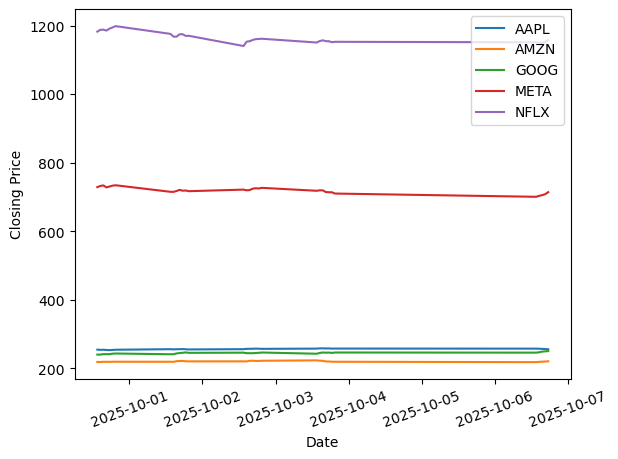

In [35]:
plt.plot(data['Close'])
plt.legend(data['Close'].columns)
plt.xticks(rotation=20)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

When researching how to strip a filename of an extension I found [this](https://stackoverflow.com/questions/3548673/how-can-i-replace-or-strip-an-extension-from-a-filename-in-python) resource that suggested using `os.path.splitext`. I ammended the implimentation to suit my needs in this case.

In [48]:
def plot_data():
    list_of_files = glob.glob('data/*.csv')
    latest_file = max(list_of_files, key=os.path.getctime)
    print(latest_file)
    data = pd.read_csv(latest_file, header=[0, 1], index_col=0, parse_dates=True)
    plt.plot(data['Close'])
    plt.legend(data['Close'].columns)
    plt.xticks(rotation=20)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.savefig(f"plots/{os.path.splitext(latest_file)[0][5:]}.png")

data\20251006_191603.csv


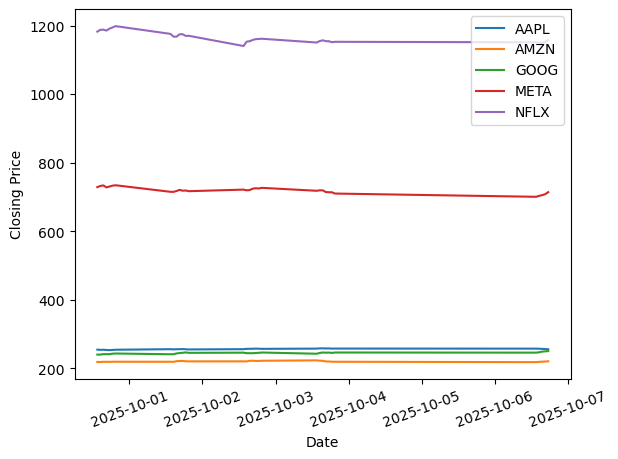

In [49]:
plot_data()

## Problem 3: Script

> Create a Python script called `faang.py` in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

## Problem 4: Automation

> Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning. The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

## End